In [244]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [245]:
df= pd.read_csv("E:\\DS Assignment\\Airlines+Data.csv") 
print('Shape of the data',df.shape)
df.head(10)


Shape of the data (96, 2)


,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [246]:
df.head(10)


,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [247]:
df.isnull().any()


Month         False
Passengers    False
dtype: bool

<Axes: >

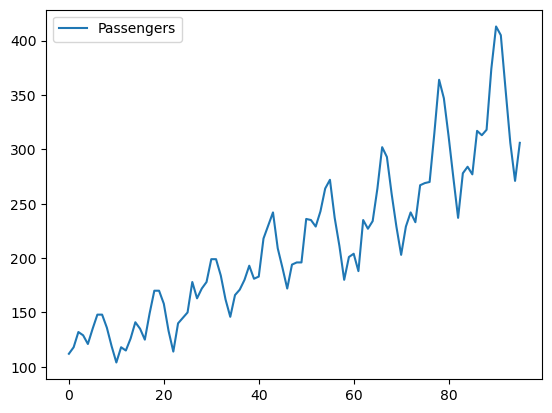

In [248]:
df.plot()

In [249]:
df.isnull().sum()


Month         0
Passengers    0
dtype: int64

<Axes: >

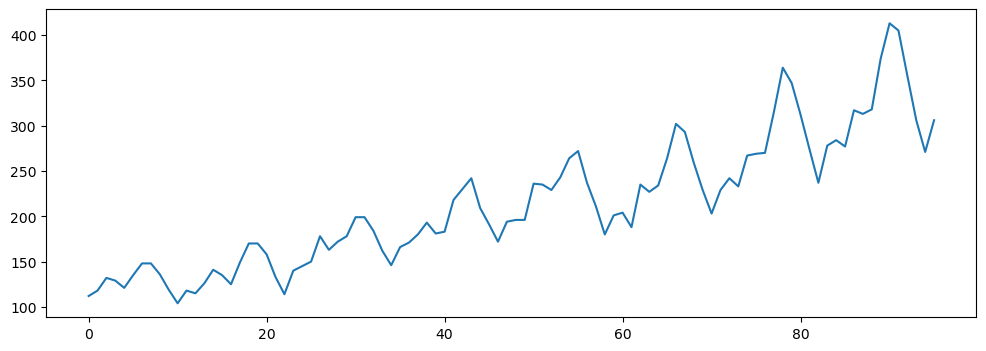

In [250]:
df.Passengers.plot(figsize=(12,4))


In [251]:
df.shape


(96, 2)

In [252]:
df.dtypes


Month         object
Passengers     int64
dtype: object

In [253]:
df.nunique()


Month         96
Passengers    80
dtype: int64

In [254]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [255]:
df[df.duplicated()].shape


(0, 2)

In [256]:
df[df.duplicated()]


,Month,Passengers


In [257]:
df.describe()


,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [258]:
df.rename({'Month':'Date'},axis=1, inplace=True)


In [259]:
df1 = df.copy()
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.dropna(subset=['Date'])

df1.set_index('Date', inplace=True)
df1['year'] = df1.index.year


In [260]:
df1.head()


,Passengers,year
Date,,
1995-01-01,112,1995
1995-02-01,118,1995
1995-03-01,132,1995
1995-04-01,129,1995
1995-05-01,121,1995


In [261]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)


,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


<Axes: xlabel='month', ylabel='year'>

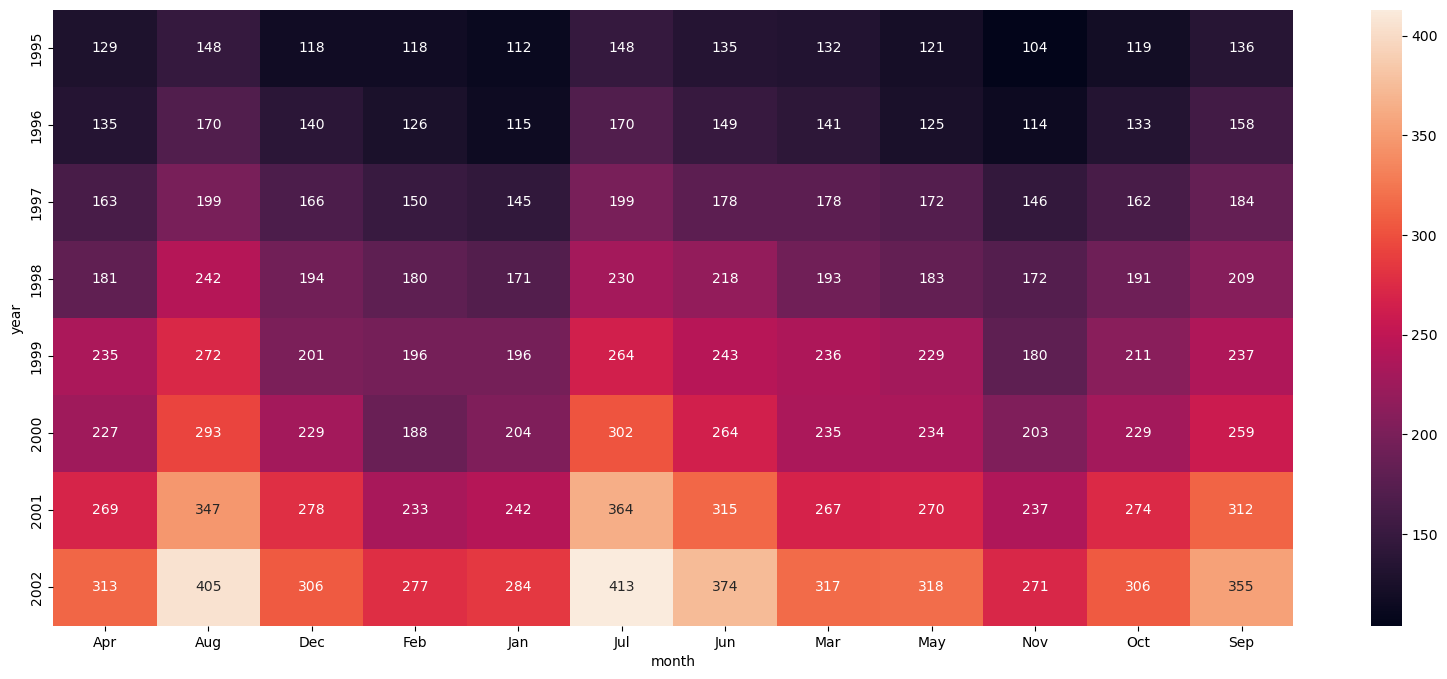

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

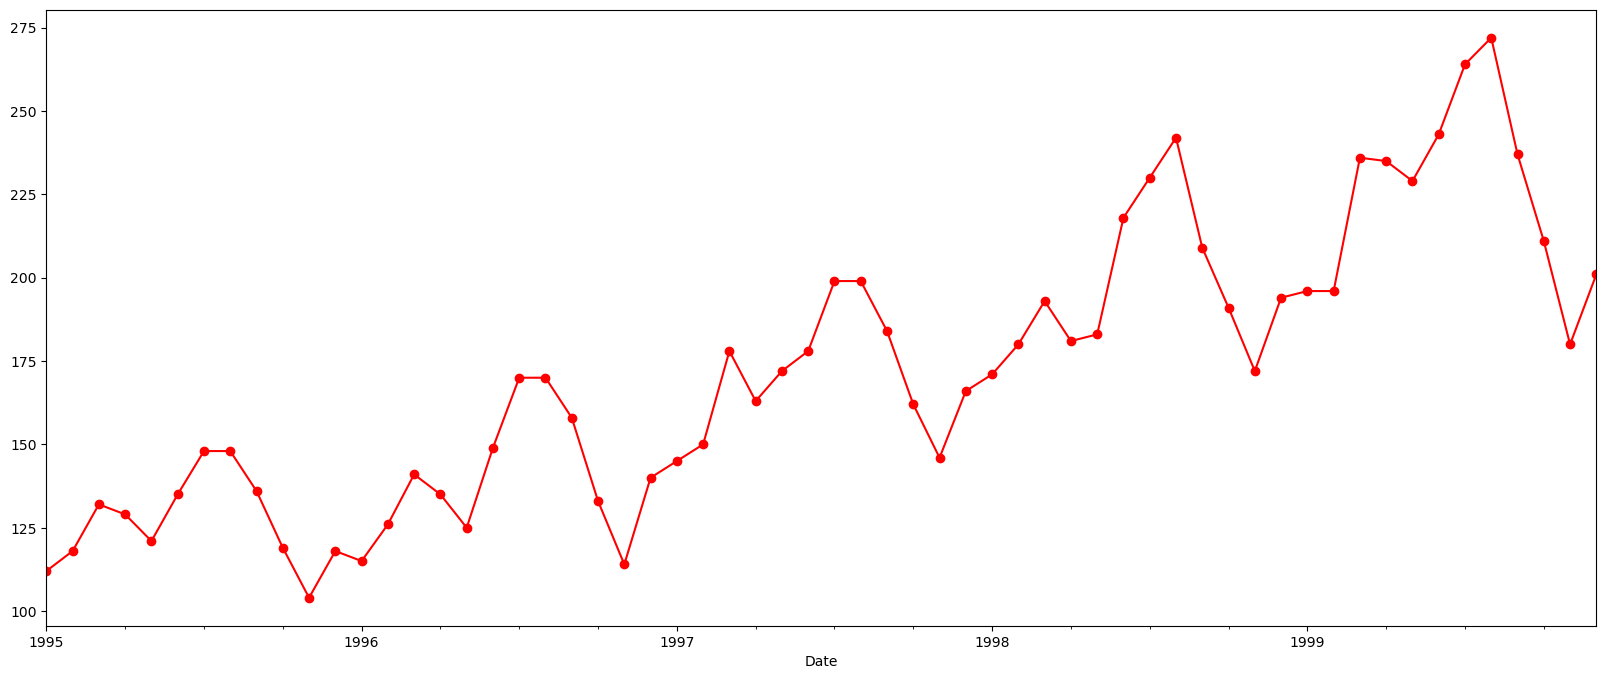

In [263]:
#Line plot
df1['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()


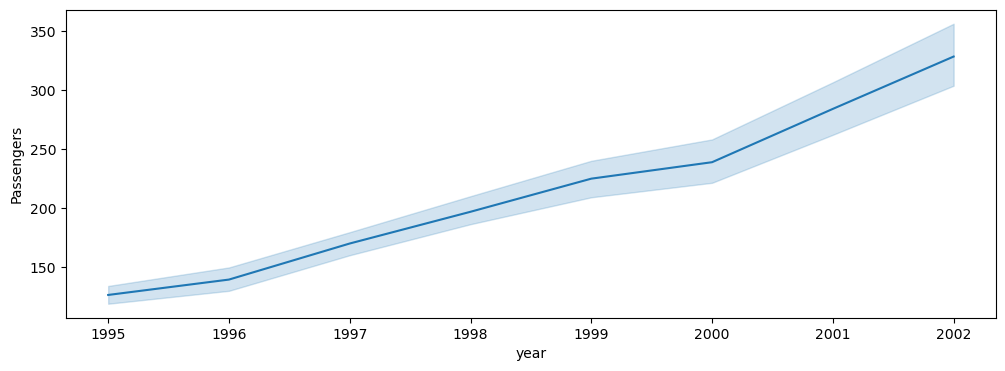

In [264]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Passengers",data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<Axes: xlabel='year', ylabel='Passengers'>

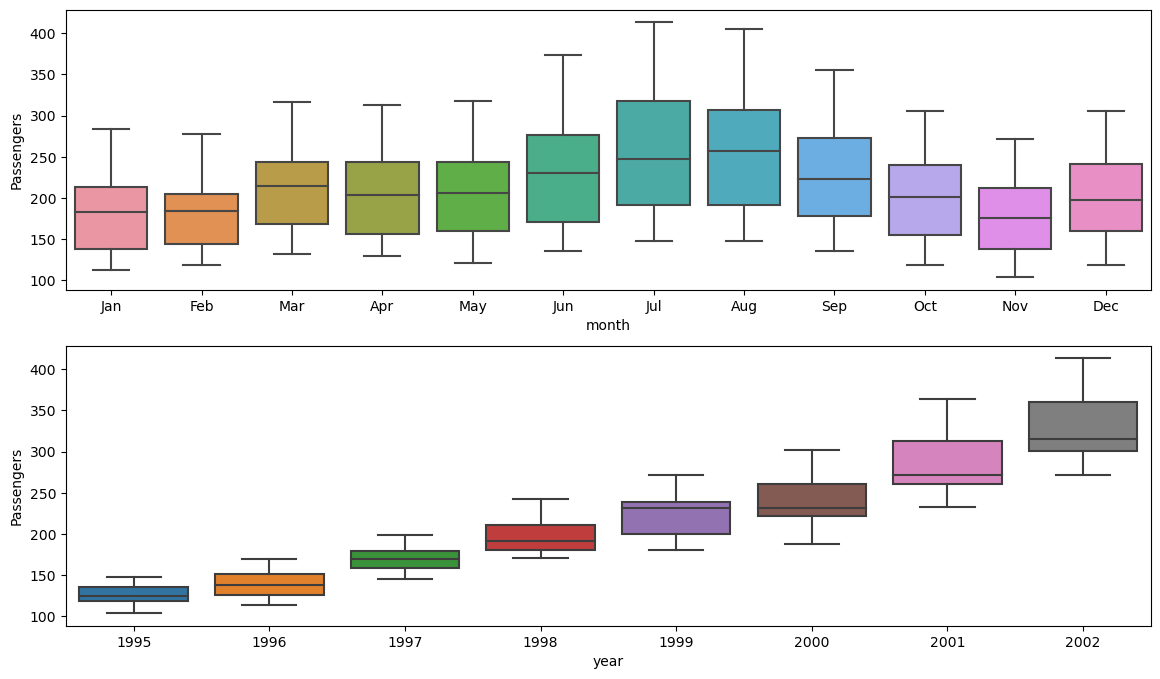

In [265]:
# Boxplot for ever
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

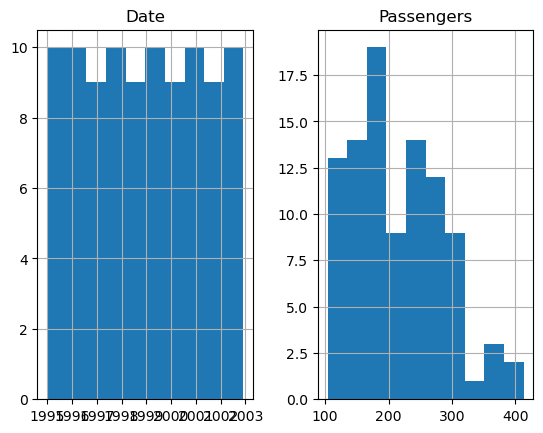

In [266]:
#Histogram and Density plots
from matplotlib import pyplot
df.hist()
pyplot.show()

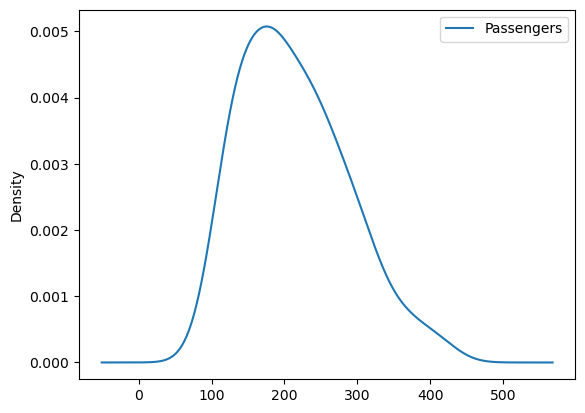

In [267]:
df= pd.read_csv("E:\\DS Assignment\\Airlines+Data.csv") 
df.plot(kind='kde')#kernel density estimation
pyplot.show()

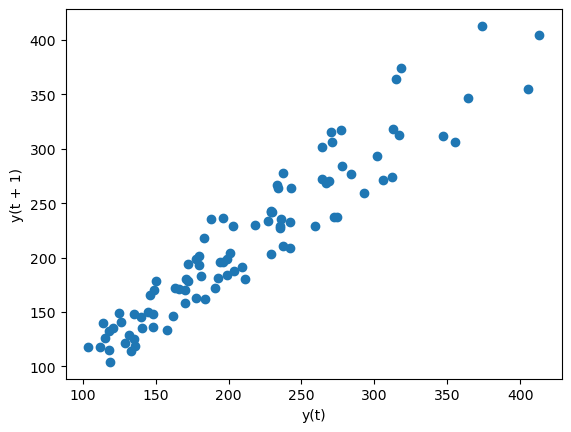

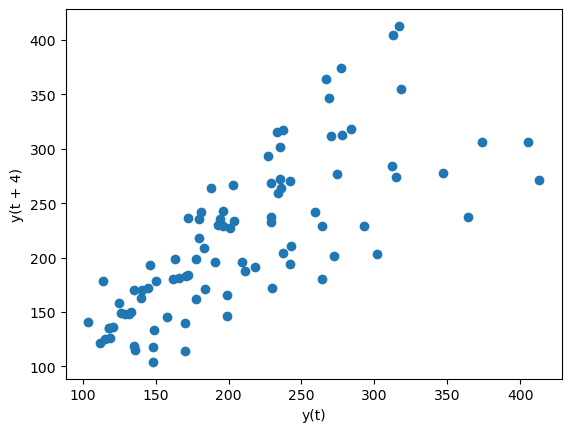

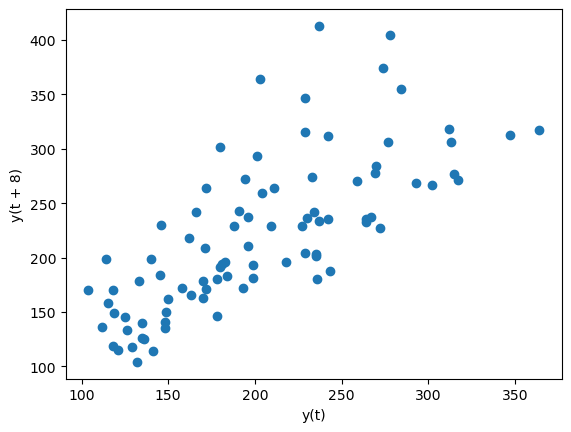

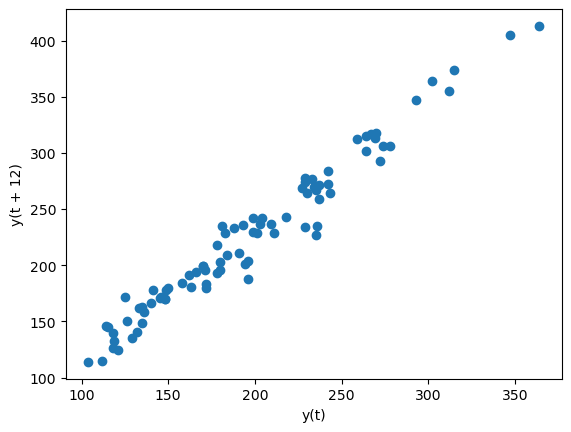

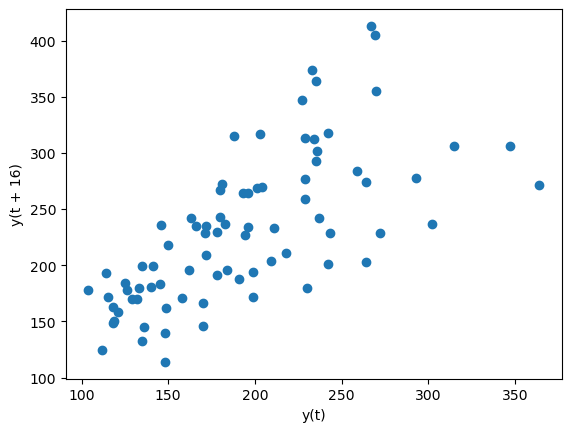

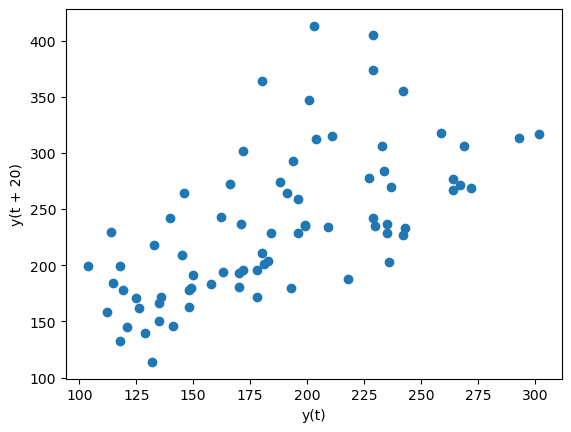

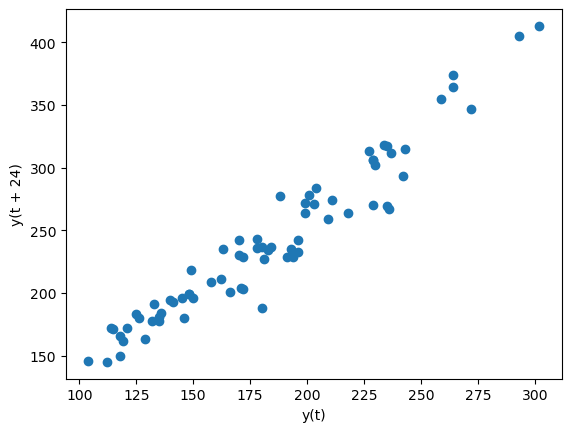

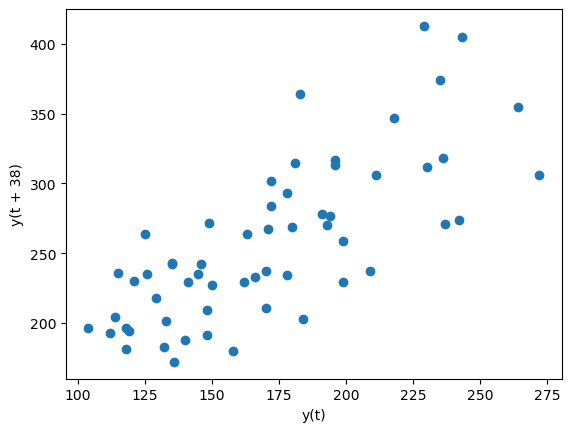

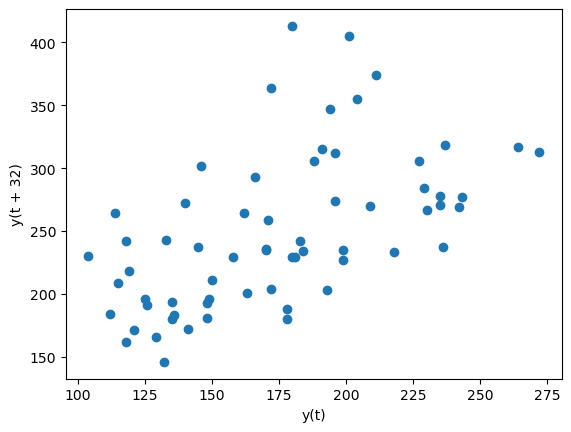

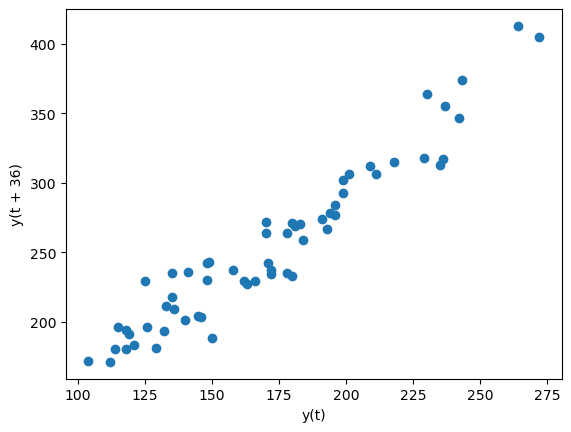

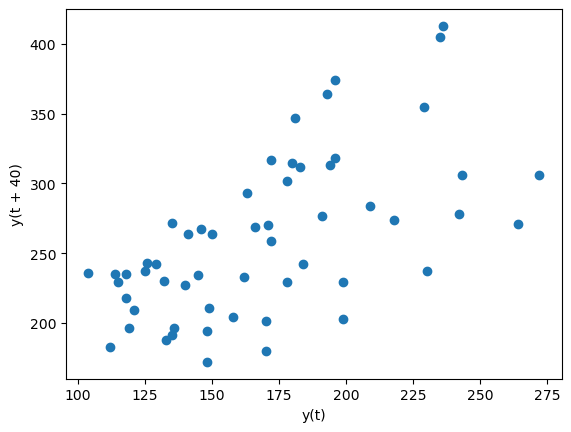

In [268]:
# create a scatter plot
from pandas.plotting import lag_plot

for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Passengers, lag=i)
    plt.show()

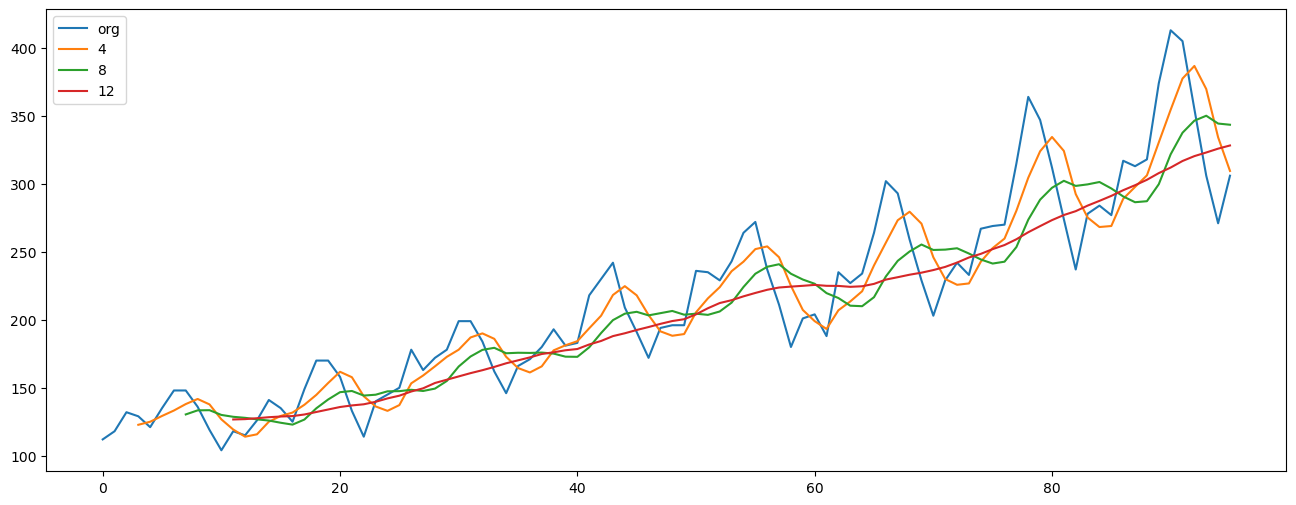

In [269]:
plt.figure(figsize=(16,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

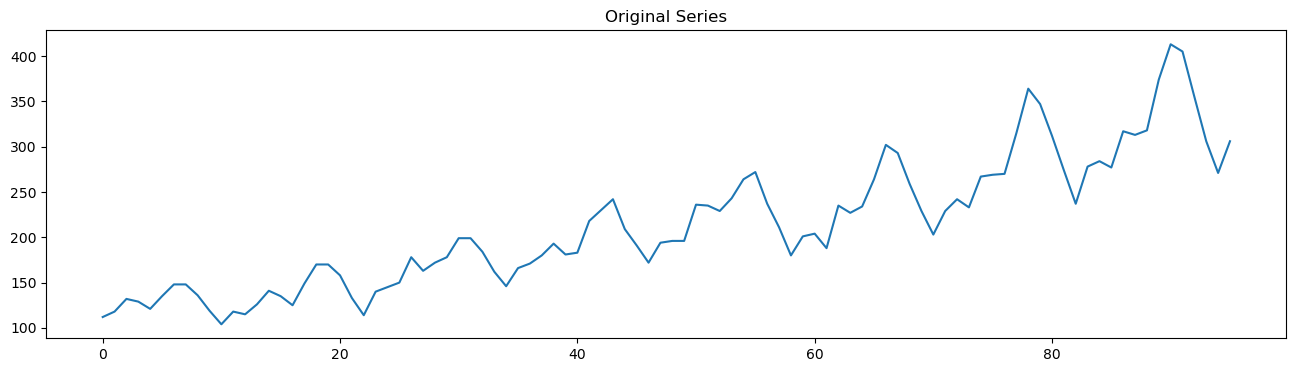

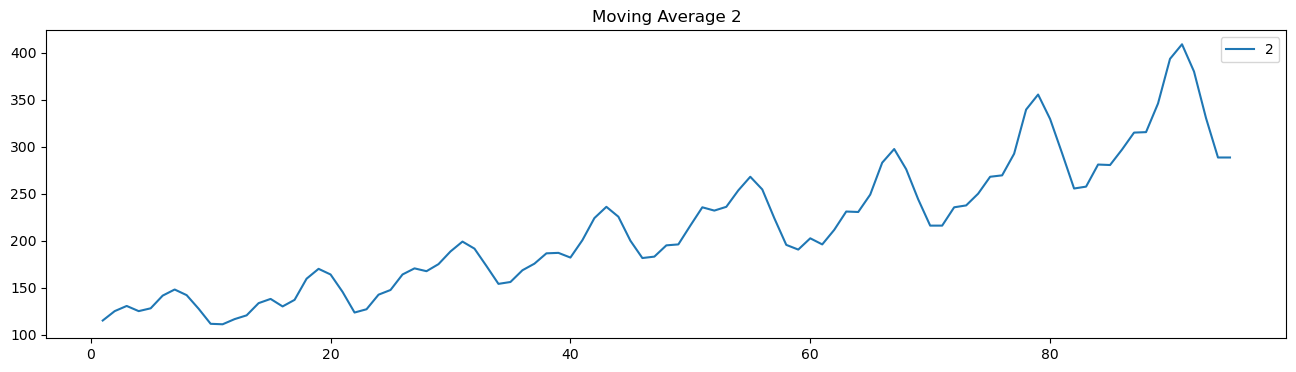

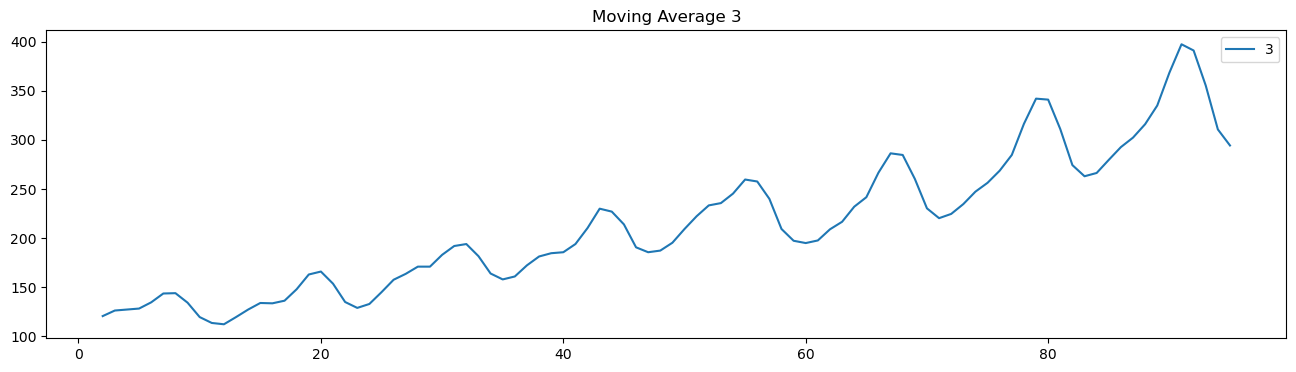

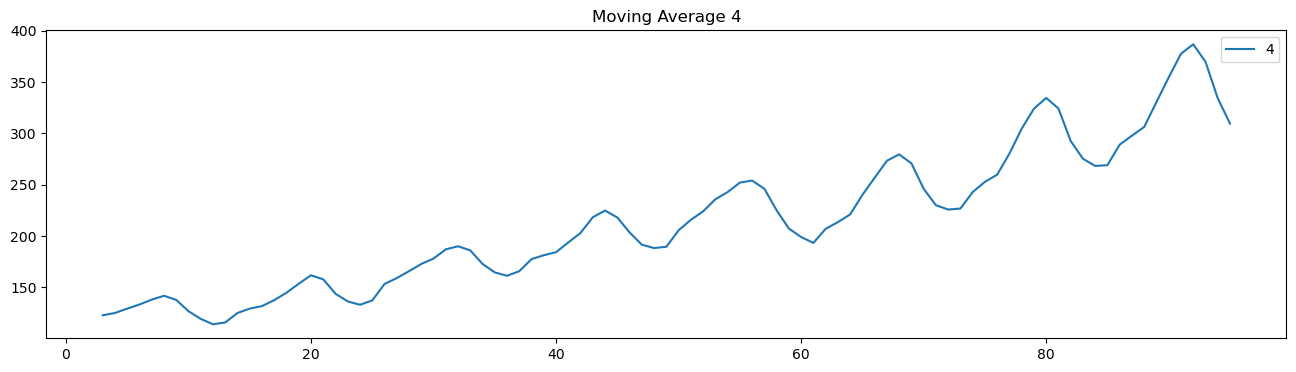

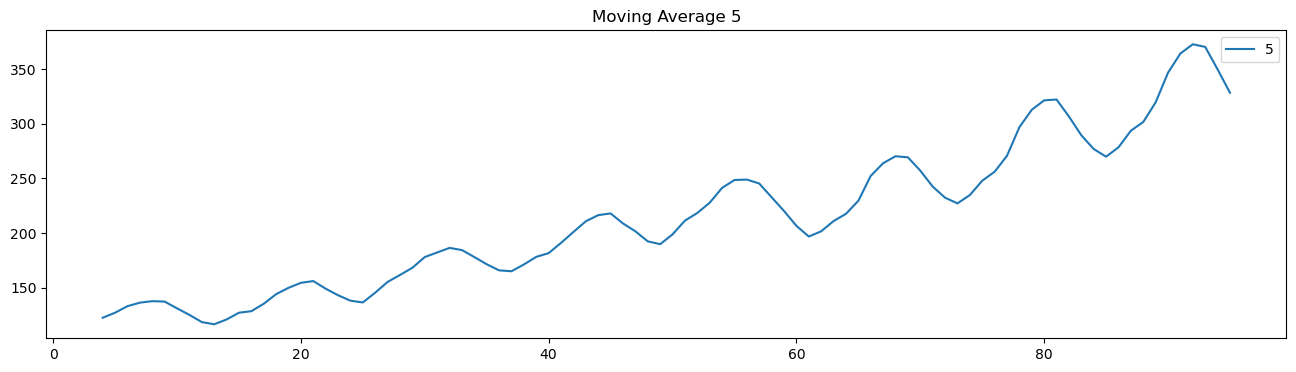

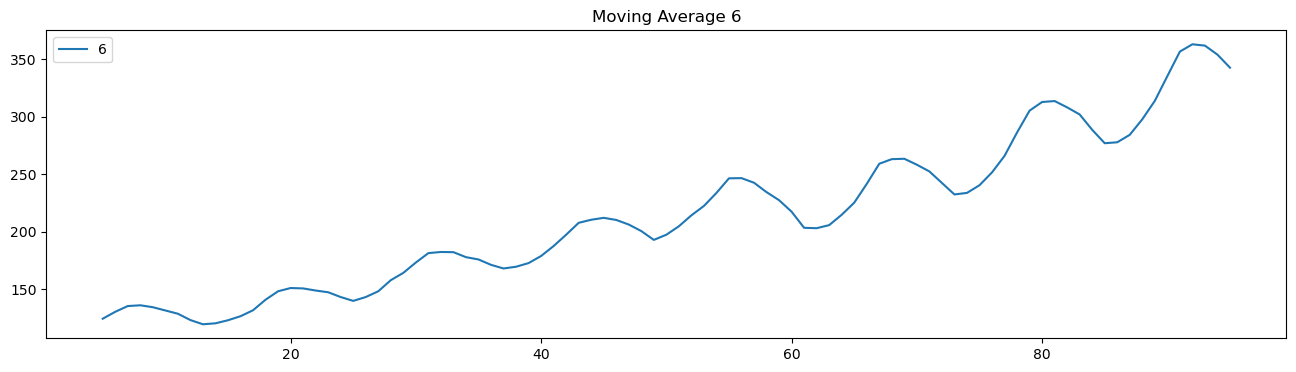

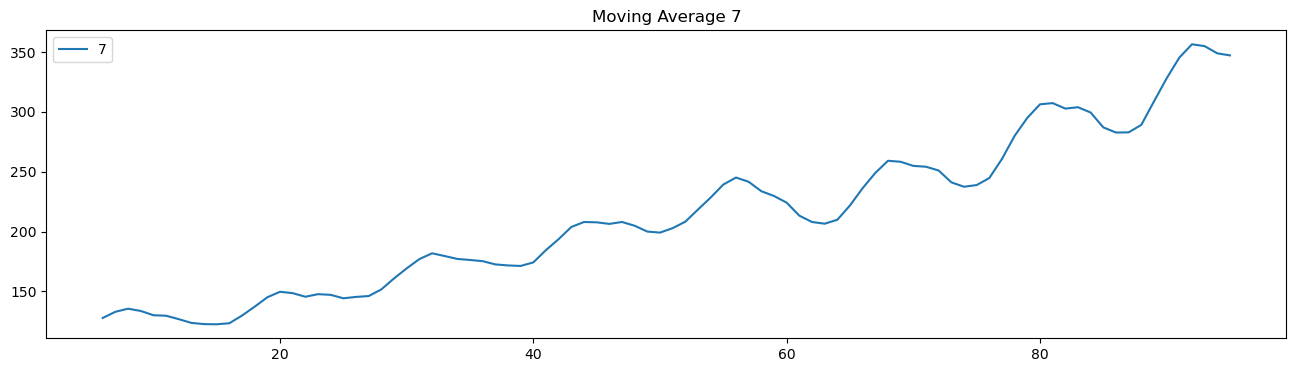

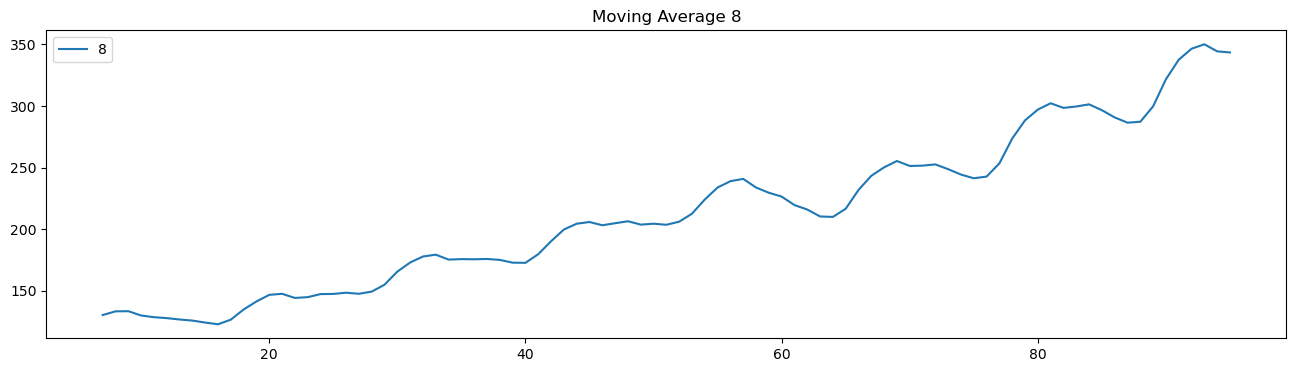

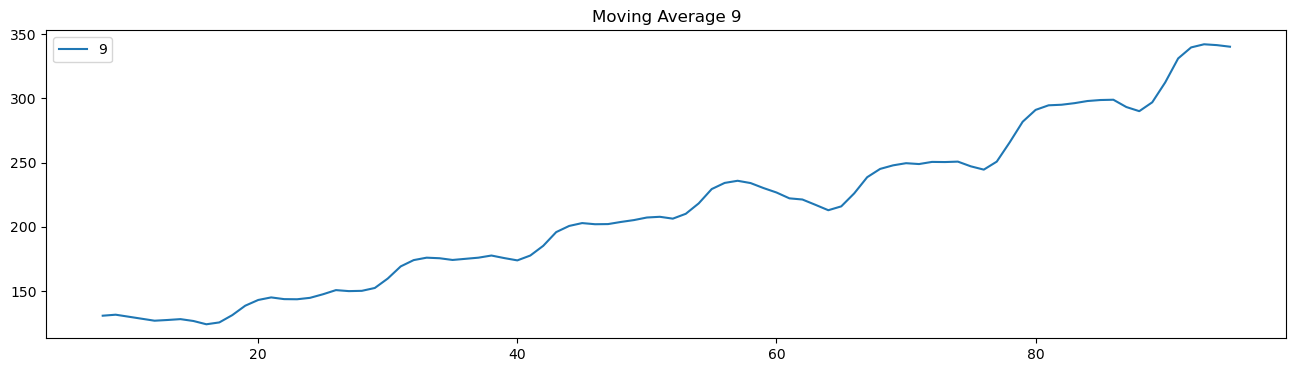

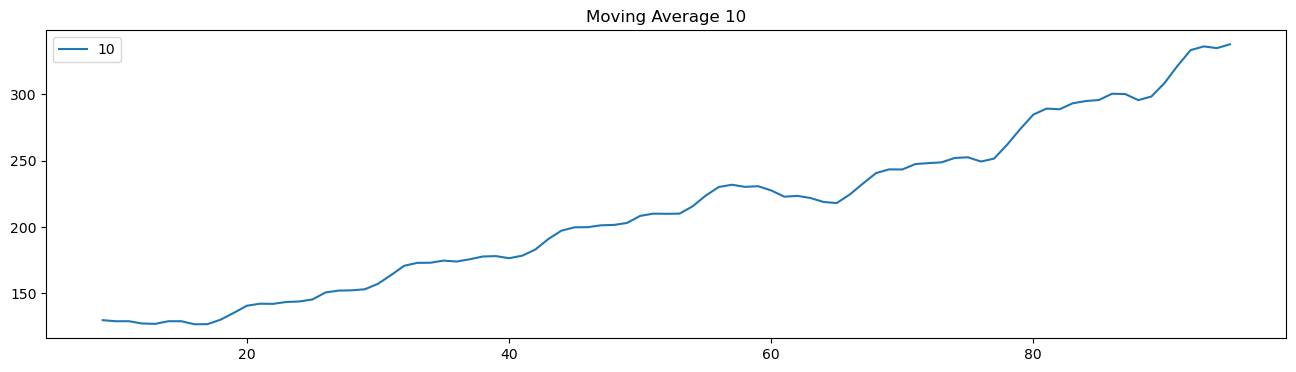

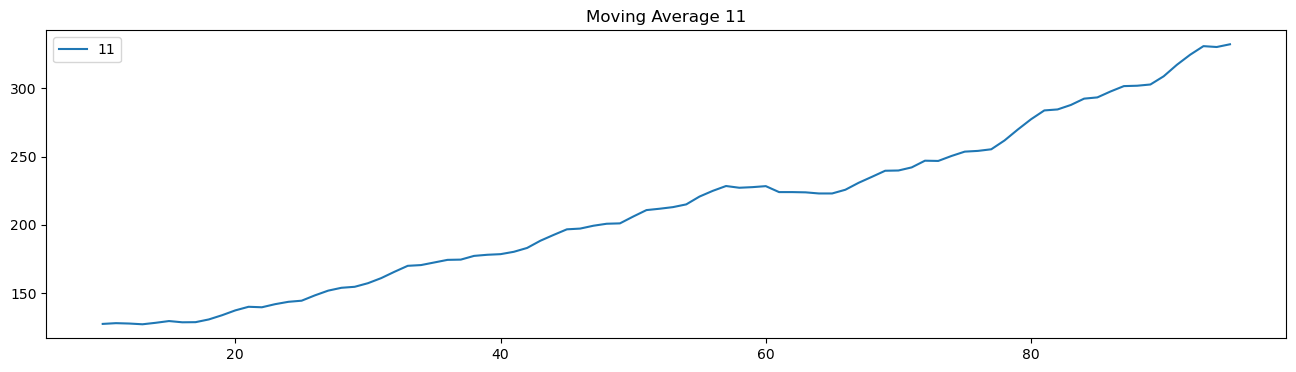

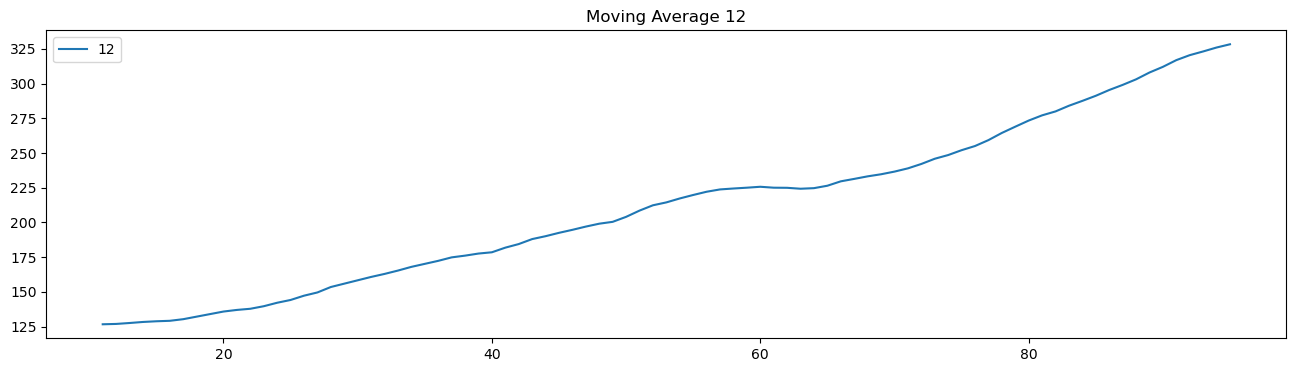

In [270]:
plt.figure(figsize=(16,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13):
    plt.figure(figsize=(16,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()


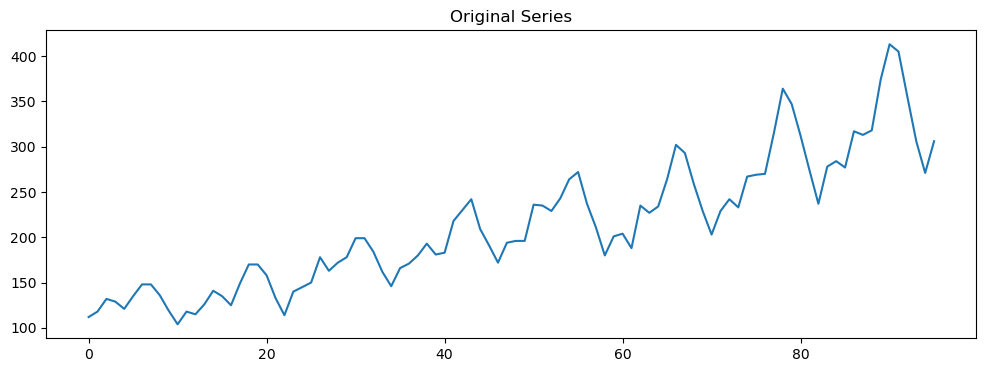

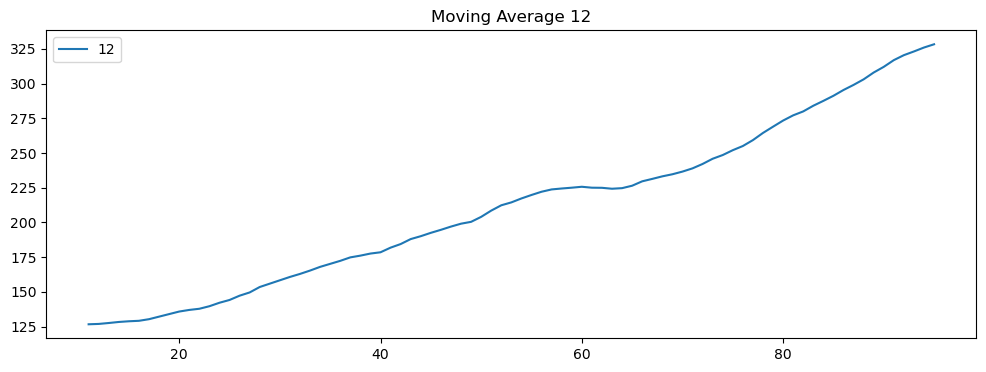

In [271]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

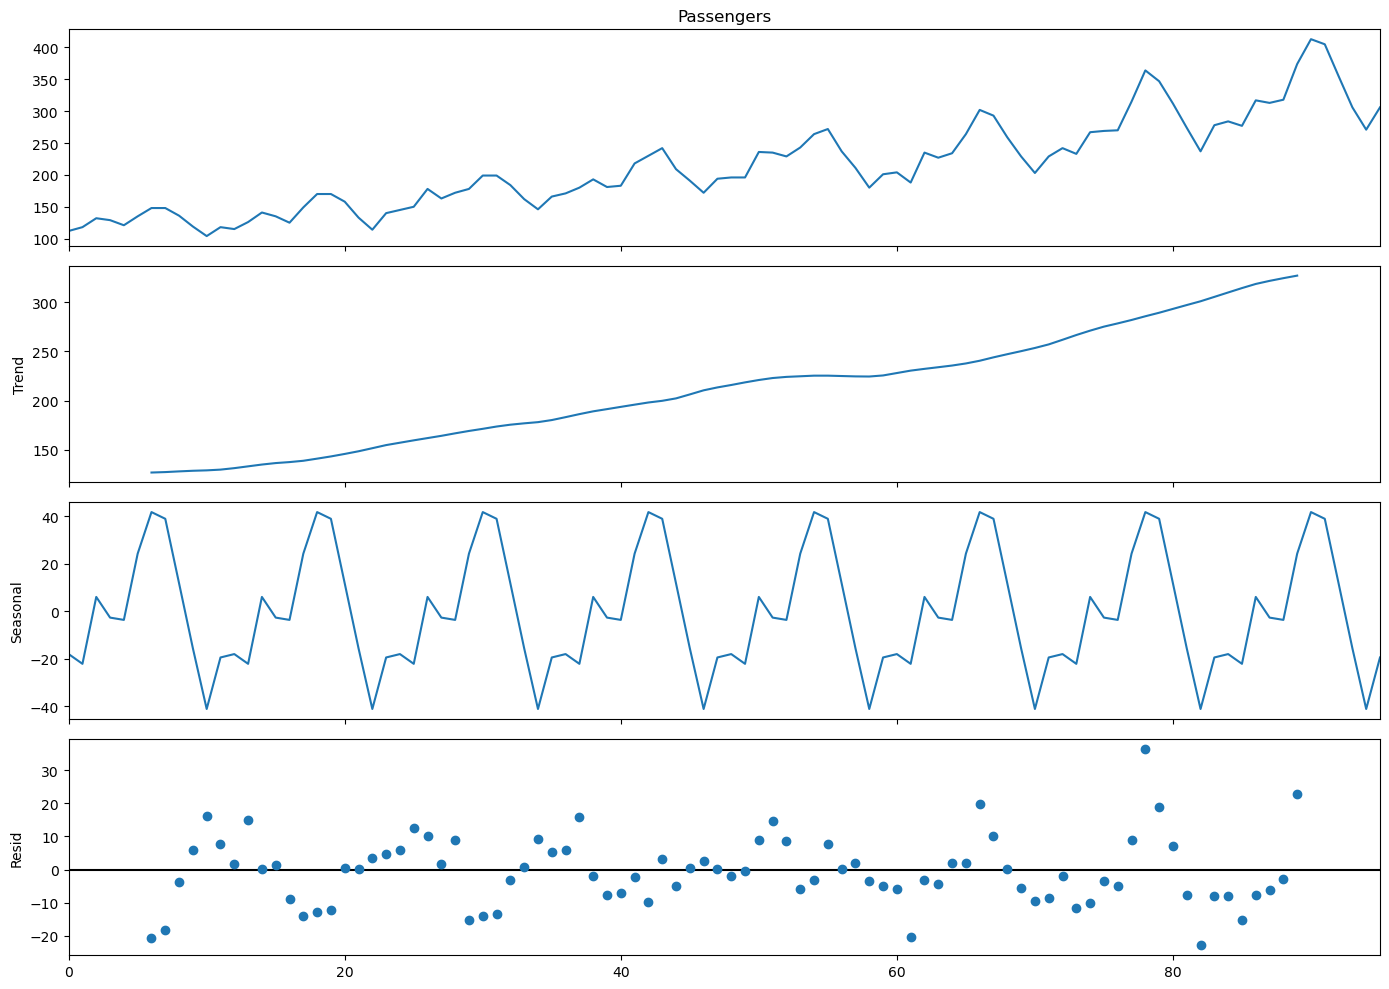

In [272]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

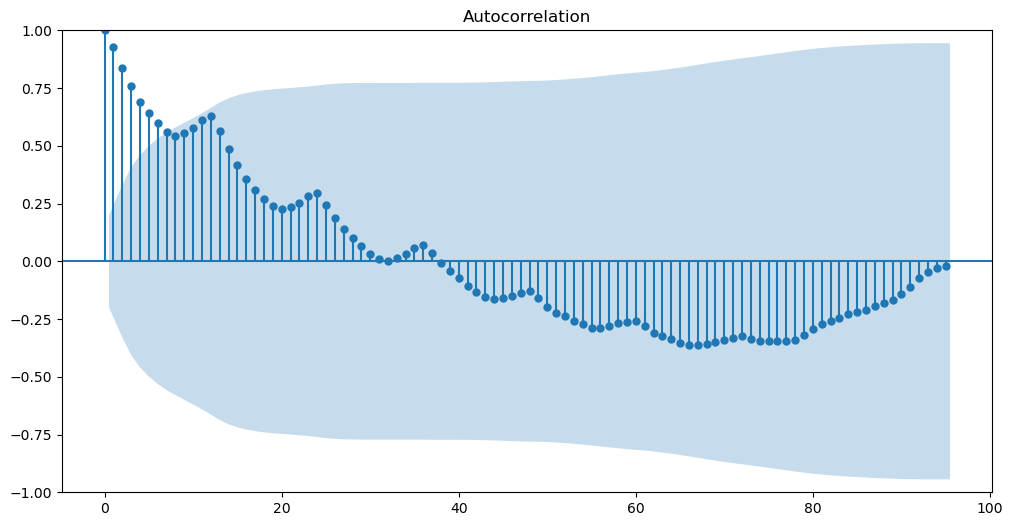

In [273]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    plt.show()

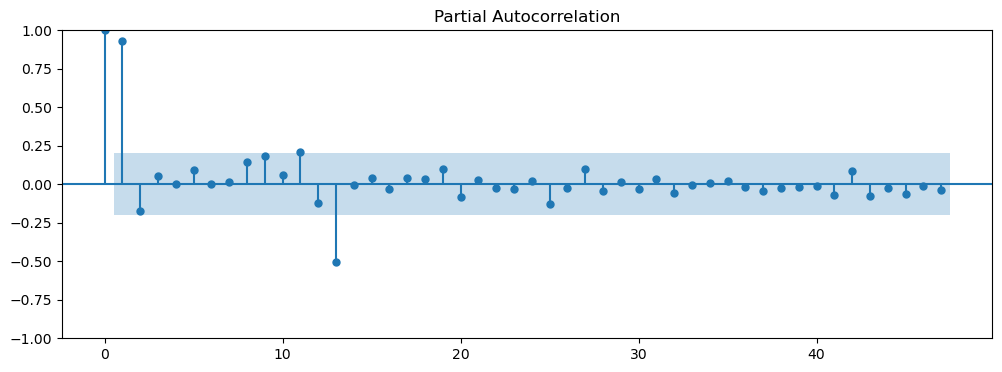

In [274]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

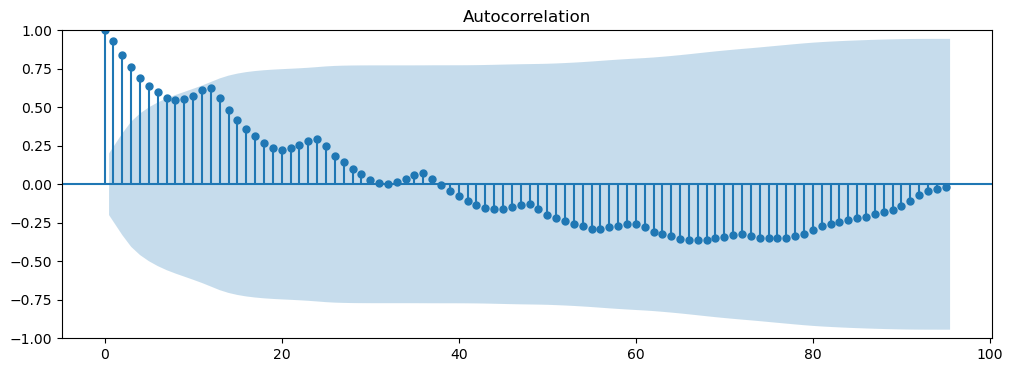

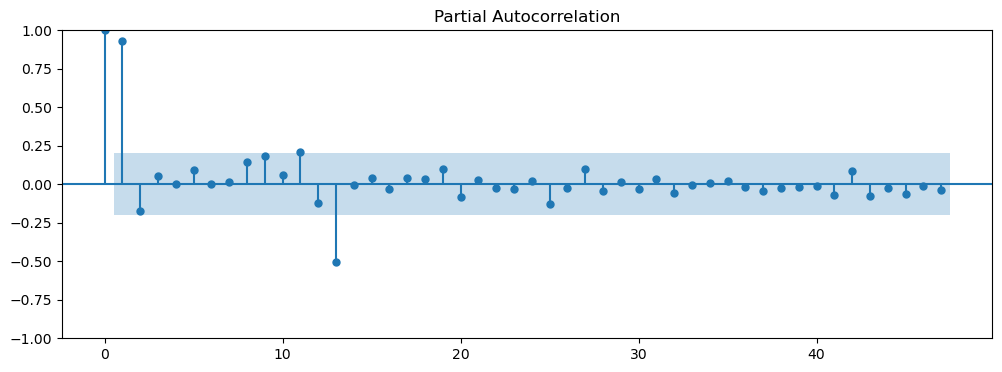

In [275]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

In [276]:
visual = df1.copy()


In [277]:
visual = df1.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual.head(10)

,Passengers,year,date,month,week,quarter,day_of_week
0,112,1995,1995-01-01,1,52,1,Sunday
1,118,1995,1995-02-01,2,5,1,Wednesday
2,132,1995,1995-03-01,3,9,1,Wednesday
3,129,1995,1995-04-01,4,13,2,Saturday
4,121,1995,1995-05-01,5,18,2,Monday
5,135,1995,1995-06-01,6,22,2,Thursday
6,148,1995,1995-07-01,7,26,3,Saturday
7,148,1995,1995-08-01,8,31,3,Tuesday
8,136,1995,1995-09-01,9,35,3,Friday
9,119,1995,1995-10-01,10,39,4,Sunday


In [278]:
visual.year.unique()


array([1995, 1996, 1997, 1998, 1999], dtype=int64)

In [279]:
train_data = df1.iloc[:-24]
test_data = df1.iloc[:30]


In [280]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 1997-12-01 00:00:00 
 Test: 1995-01-01 00:00:00 1997-06-01 00:00:00


<Axes: xlabel='Date'>

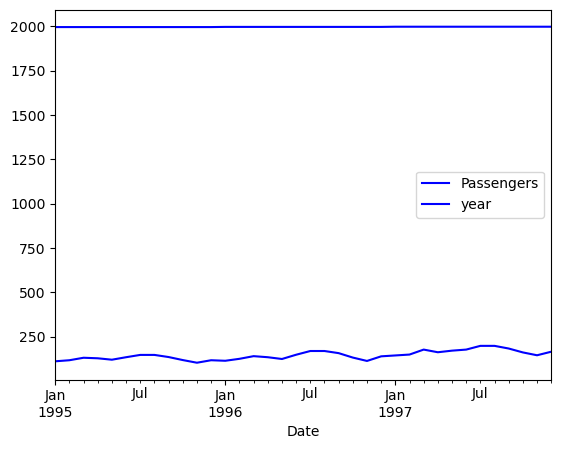

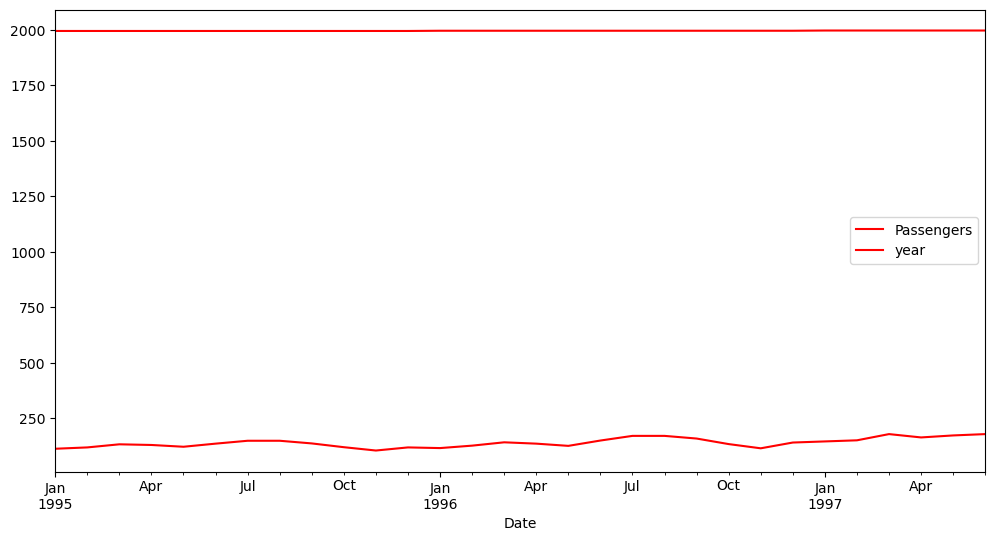

In [281]:
train_data.plot(legend=True,label='TRAIN',color='blue')
test_data.plot(legend=True,label='TEST', figsize=(12,6),color='red')

In [282]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [283]:
print(test_data)


            Passengers  year
Date                        
1995-01-01         112  1995
1995-02-01         118  1995
1995-03-01         132  1995
1995-04-01         129  1995
1995-05-01         121  1995
1995-06-01         135  1995
1995-07-01         148  1995
1995-08-01         148  1995
1995-09-01         136  1995
1995-10-01         119  1995
1995-11-01         104  1995
1995-12-01         118  1995
1996-01-01         115  1996
1996-02-01         126  1996
1996-03-01         141  1996
1996-04-01         135  1996
1996-05-01         125  1996
1996-06-01         149  1996
1996-07-01         170  1996
1996-08-01         170  1996
1996-09-01         158  1996
1996-10-01         133  1996
1996-11-01         114  1996
1996-12-01         140  1996
1997-01-01         145  1997
1997-02-01         150  1997
1997-03-01         178  1997
1997-04-01         163  1997
1997-05-01         172  1997
1997-06-01         178  1997


In [284]:
print(test_data.isnull().sum())
print(test_data.dtypes)
from sklearn.model_selection import train_test_split

# Assuming df is your original DataFrame
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)  # Adjust parameters as needed
test_data = test_data.dropna(subset=['Passengers'])


Passengers    0
year          0
dtype: int64
Passengers    int64
year          int64
dtype: object


In [285]:
# Assuming df is your DataFrame and you want to use the last 24 rows for testing
test_data = df[-24:].copy()
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)  # Adjust to the desired number of time steps
# Reset index if needed
test_data.reset_index(drop=True, inplace=True)


In [286]:
print(df.dtypes)


Month         object
Passengers     int64
dtype: object


In [287]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

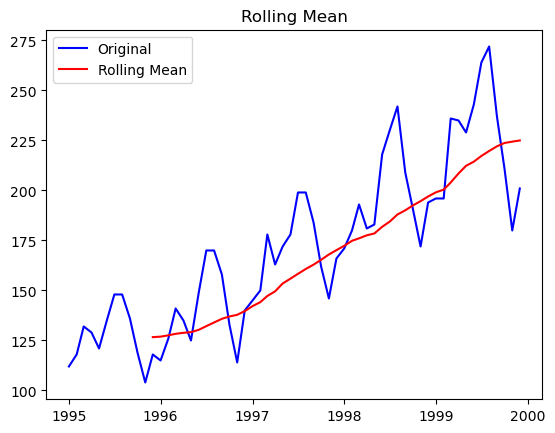

Results of Dickey Fuller Test:
Test Statistic                  2.093529
p-value                         0.998783
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [288]:
from statsmodels.tsa.stattools import adfuller

sales= pd.DataFrame()
sales['Passengers'] = df1[['Passengers']]
test_stationarity(sales)

In [289]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [290]:
adf_test(sales)


Fail to reject the null hypothesis
Data is non-stationary


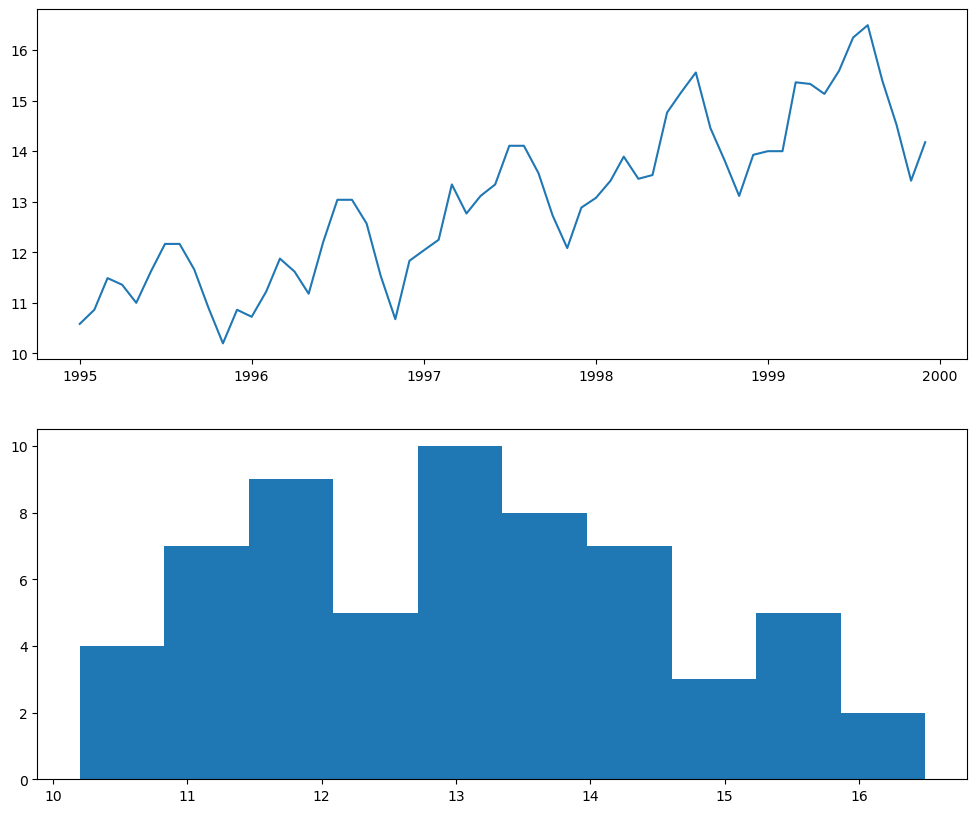

In [291]:
square_root= pd.DataFrame()
square_root = df1[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

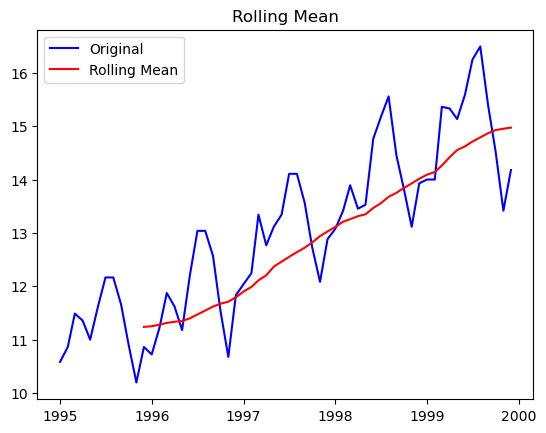

Results of Dickey Fuller Test:
Test Statistic                  1.175011
p-value                         0.995809
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [292]:
test_stationarity(square_root)


In [293]:
adf_test(square_root)


Fail to reject the null hypothesis
Data is non-stationary


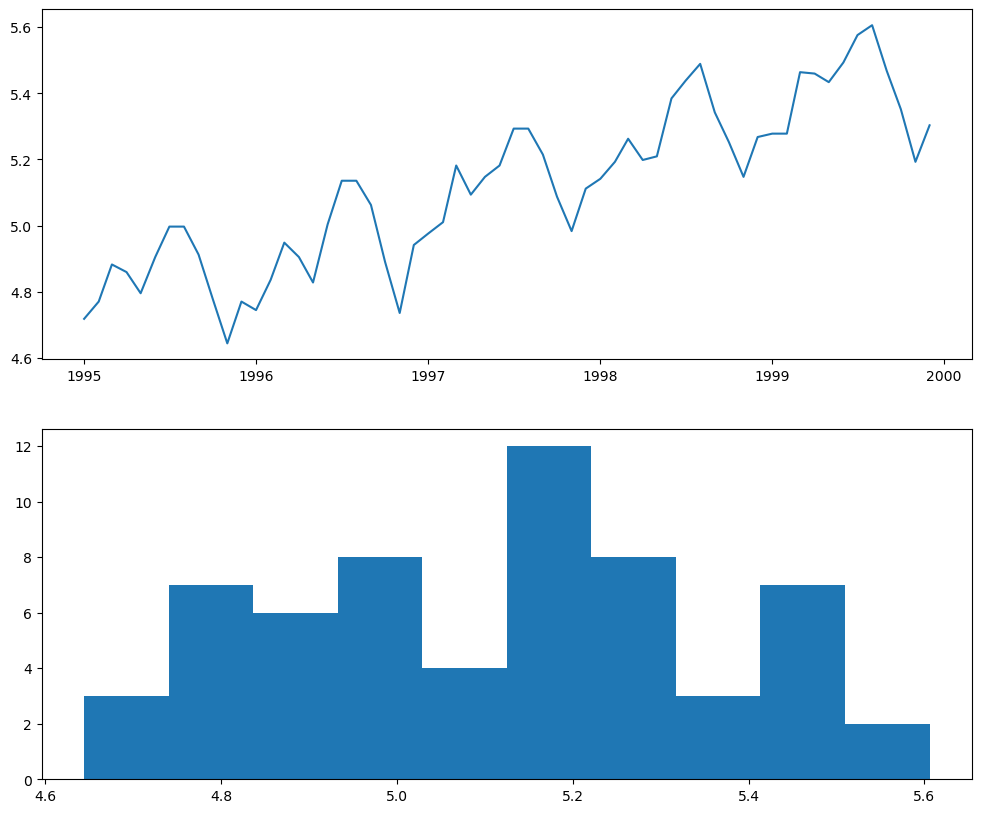

In [294]:
log = pd.DataFrame()
log = df1[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()


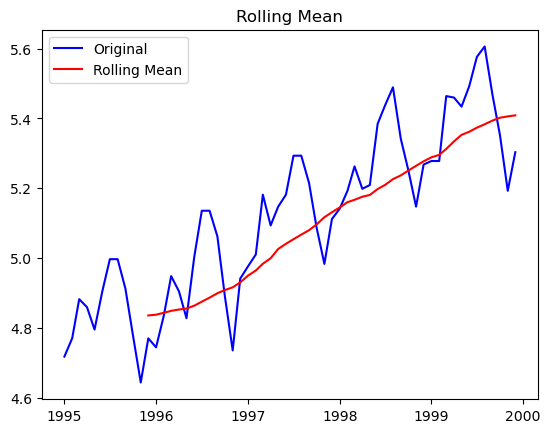

Results of Dickey Fuller Test:
Test Statistic                  0.317699
p-value                         0.978142
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [295]:
test_stationarity(log)


In [296]:
adf_test(log)


Fail to reject the null hypothesis
Data is non-stationary


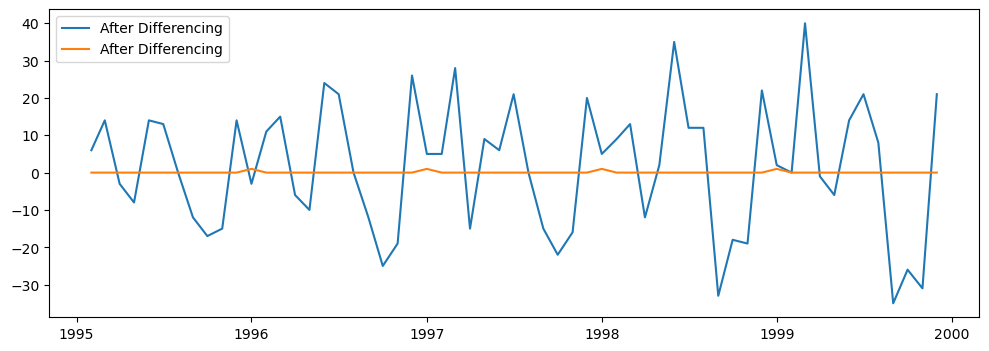

In [297]:
differencing = df1 - df1.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

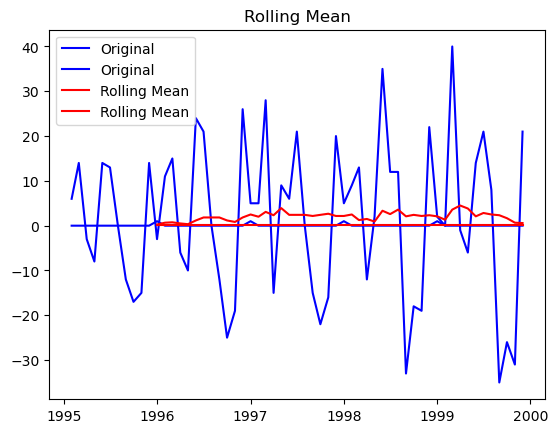

Results of Dickey Fuller Test:
Test Statistic                 -3.307533
p-value                         0.014545
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [298]:
test_stationarity(differencing)


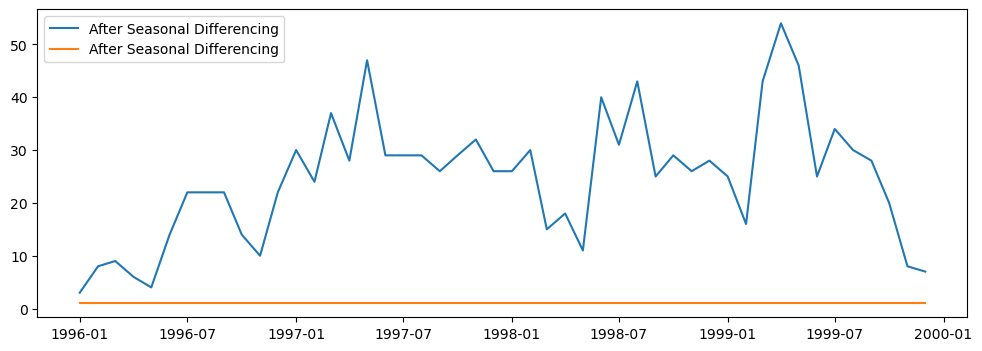

In [299]:
seasonal_differencing = df1 - df1.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

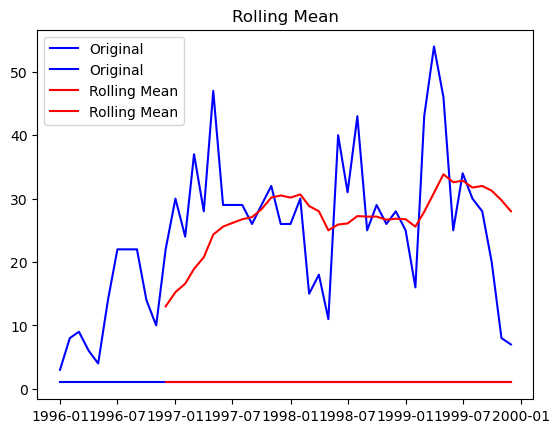

Results of Dickey Fuller Test:
Test Statistic                 -3.503244
p-value                         0.007904
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [300]:
test_stationarity(seasonal_differencing)


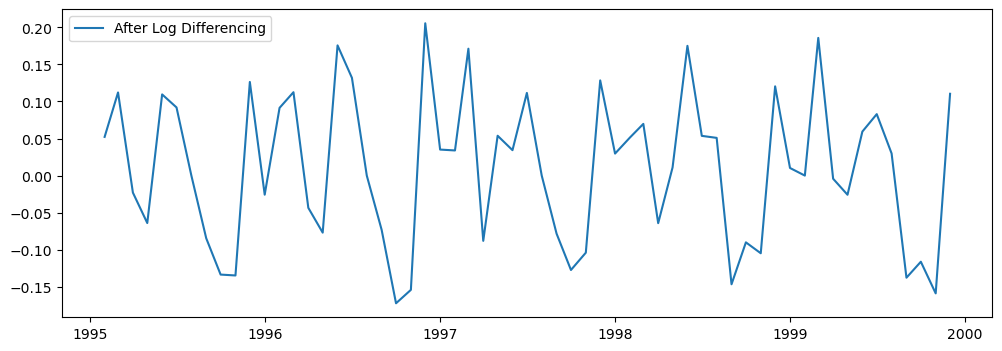

In [301]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

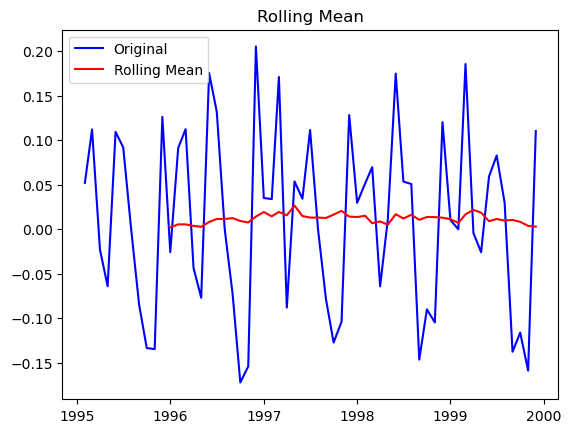

Results of Dickey Fuller Test:
Test Statistic                 -3.458224
p-value                         0.009127
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [302]:
test_stationarity(log_diff)


In [303]:
adf_test(log_diff)


Reject the null hypothesis
Data is stationary


,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


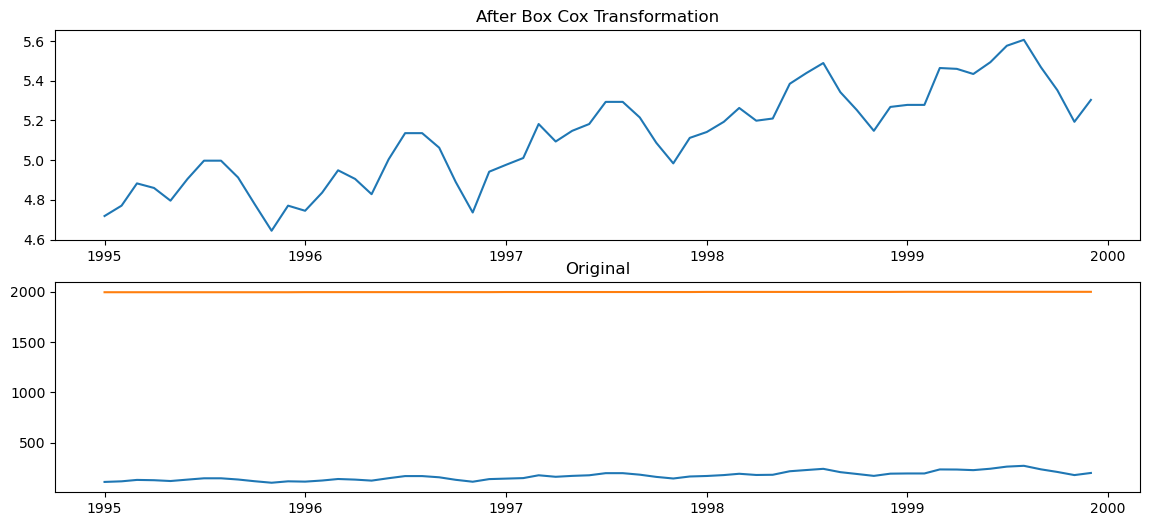

In [304]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(df1['Passengers'], lmbda=0), df1.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df1, label='original')
axis[1].set_title('Original')
plt.show()

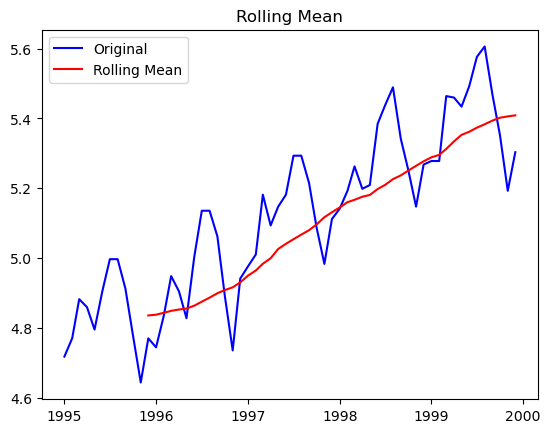

Results of Dickey Fuller Test:
Test Statistic                  0.317699
p-value                         0.978142
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [305]:
test_stationarity(data_boxcox)


In [306]:
adf_test(data_boxcox)


Fail to reject the null hypothesis
Data is non-stationary


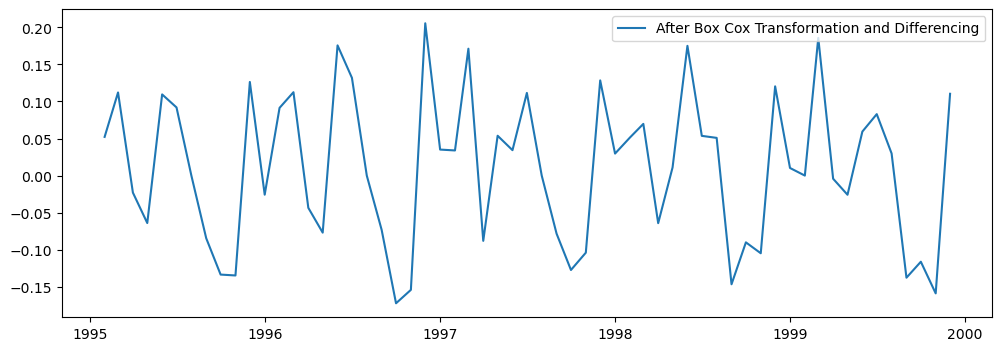

In [307]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

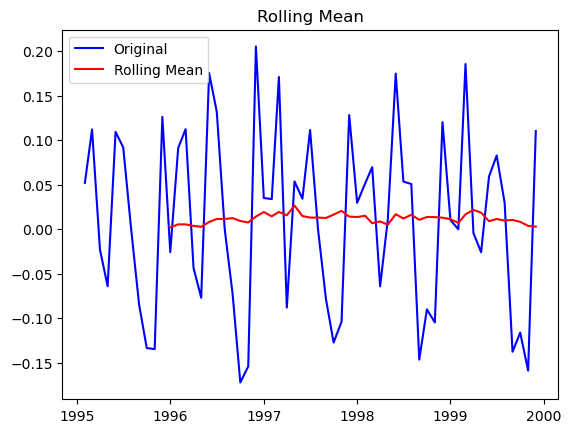

Results of Dickey Fuller Test:
Test Statistic                 -3.458224
p-value                         0.009127
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [308]:
test_stationarity(data_boxcox_diff)


In [309]:
adf_test(data_boxcox_diff)


Reject the null hypothesis
Data is stationary


In [310]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [311]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)


In [312]:
size = 72
train_data = df1[:size]
test_data = df1[size:]

In [313]:
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]

In [314]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

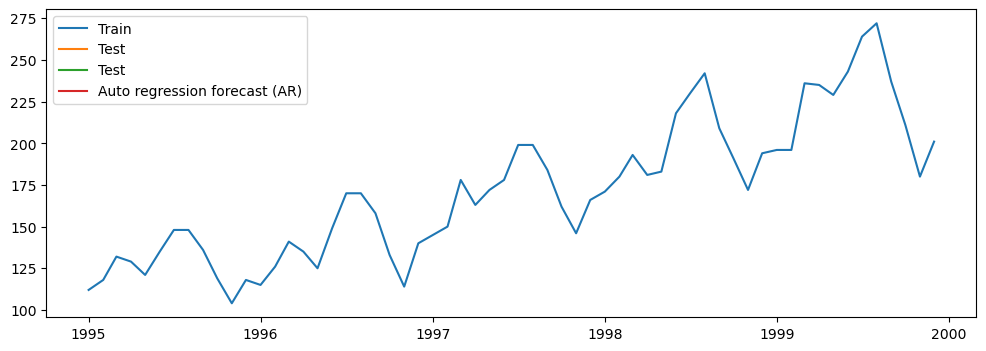

In [315]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()


In [316]:
print(test_data.index)
print(y_hat_ar['arima_forecast'].index)


DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01', '1995-12-01', '1996-01-01',
               '1996-02-01', '1996-03-01', '1996-04-01', '1996-05-01',
               '1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01', '1997-04-01', '1997-05-01',
               '1997-06-01', '1997-07-01', '1997-08-01', '1997-09-01',
               '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01',
               '1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
               '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
               '1998-10-01', '1998-11-01', '1998-12-01', '1999-01-01',
               '1999-02-01', '1999-03-01', '1999-04-01', '1999-05-01',
           

In [317]:
aligned_data = test_data.align(y_hat_ar['arima_forecast'], join='inner', axis=0)
y_true_aligned = aligned_data[0]
y_pred_aligned = aligned_data[1]


In [318]:
y_true = test_data['Passengers'].values  # Replace 'Passengers' with your actual column name


In [319]:
y_pred = y_hat_ar.loc[test_data.index, 'arima_forecast'].values


In [320]:
print("test_data:")
print(test_data)

print("y_hat_ar:")
print(y_hat_ar)


test_data:
Empty DataFrame
Columns: [Passengers, year]
Index: []
y_hat_ar:
            Passengers  arima_forecast
Date                                  
1995-02-01    0.052186      112.000000
1995-03-01    0.112117      118.000000
1995-04-01   -0.022990      129.817976
1995-05-01   -0.064022      130.780535
1995-06-01    0.109484      130.090064
1995-07-01    0.091937      138.426654
1995-08-01    0.000000      148.994703
1995-09-01   -0.084557      159.926111
1995-10-01   -0.133531      153.073883
1995-11-01   -0.134733      149.364506
1995-12-01    0.126294      157.527173
1996-01-01   -0.025752      173.451767
1996-02-01    0.091350      178.330624
1996-03-01    0.112478      196.469897
1996-04-01   -0.043485      193.402823
1996-05-01   -0.076961      186.832264
1996-06-01    0.175633      186.671639
1996-07-01    0.131852      185.123337
1996-08-01    0.000000      185.863846
1996-09-01   -0.073203      183.935896
1996-10-01   -0.172246      161.065054
1996-11-01   -0.154151      

In [321]:
y_true = test_data['Passengers'].values
y_pred = y_hat_ar.loc[test_data.index, 'arima_forecast'].values


In [322]:
print("test_data.index:", test_data.index)
print("y_hat_ar.index:", y_hat_ar.index)


test_data.index: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
y_hat_ar.index: DatetimeIndex(['1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01', '1995-12-01', '1996-01-01',
               '1996-02-01', '1996-03-01', '1996-04-01', '1996-05-01',
               '1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01', '1997-04-01', '1997-05-01',
               '1997-06-01', '1997-07-01', '1997-08-01', '1997-09-01',
               '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01',
               '1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
               '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
               '1998-10-01', '1998-11-01', '1998-12-01', '1999-01-01',
               '1999-02-01', '1999-03-01', '1999-

In [323]:
print("Data types:")
print(test_data.dtypes)
print(y_hat_ar.dtypes)


Data types:
Passengers    int64
year          int64
dtype: object
Passengers        float64
arima_forecast    float64
dtype: object


In [324]:
print("Missing values in test_data:")
print(test_data['Passengers'].isnull().sum())

print("Missing values in y_hat_ar:")
print(y_hat_ar[['Passengers', 'arima_forecast']].isnull().sum())


Missing values in test_data:
0
Missing values in y_hat_ar:
Passengers        0
arima_forecast    0
dtype: int64


In [325]:
print("Passengers values:")
print(test_data['Passengers'].values)

print("arima_forecast values:")
print(y_hat_ar['arima_forecast'].values)


Passengers values:
[]
arima_forecast values:
[112.         117.99999997 129.81797608 130.78053489 130.09006402
 138.42665436 148.99470312 159.92611146 153.07388311 149.3645062
 157.52717338 173.4517666  178.33062397 196.46989691 193.40282348
 186.83226378 186.6716388  185.12333698 185.86384597 183.93589554
 161.06505448 151.26307484 163.38983768 176.34287673 183.33334299
 199.46517988 189.41792997 177.96194018 186.5386681  169.27778709
 166.28958276 166.15414824 146.92011824 138.89570878 152.53439684
 161.746439   166.661747   184.11599756 179.67402151 173.14925016
 185.92585034 185.46593222 176.96351675 175.21899803 155.25736567
 148.93882936 161.01367471 174.89702777 180.63705787 197.52300717
 203.8576307  197.95474133 201.44817734 193.29749974 189.52739761
 190.24429074 172.54401849 167.63843439 186.71536071]


In [326]:
print("test_data index:", test_data.index)
print("y_hat_ar index:", y_hat_ar.index)


test_data index: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
y_hat_ar index: DatetimeIndex(['1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01', '1995-12-01', '1996-01-01',
               '1996-02-01', '1996-03-01', '1996-04-01', '1996-05-01',
               '1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01', '1997-04-01', '1997-05-01',
               '1997-06-01', '1997-07-01', '1997-08-01', '1997-09-01',
               '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01',
               '1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
               '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
               '1998-10-01', '1998-11-01', '1998-12-01', '1999-01-01',
               '1999-02-01', '1999-03-01', '1999-

In [327]:
model_residual = model_fit.resid
model_residual.mean()

0.001249484509297817

In [328]:
adf_test(model_residual)


Fail to reject the null hypothesis
Data is non-stationary


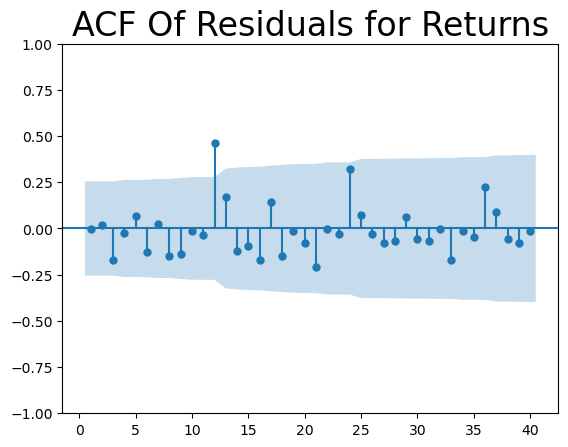

In [329]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

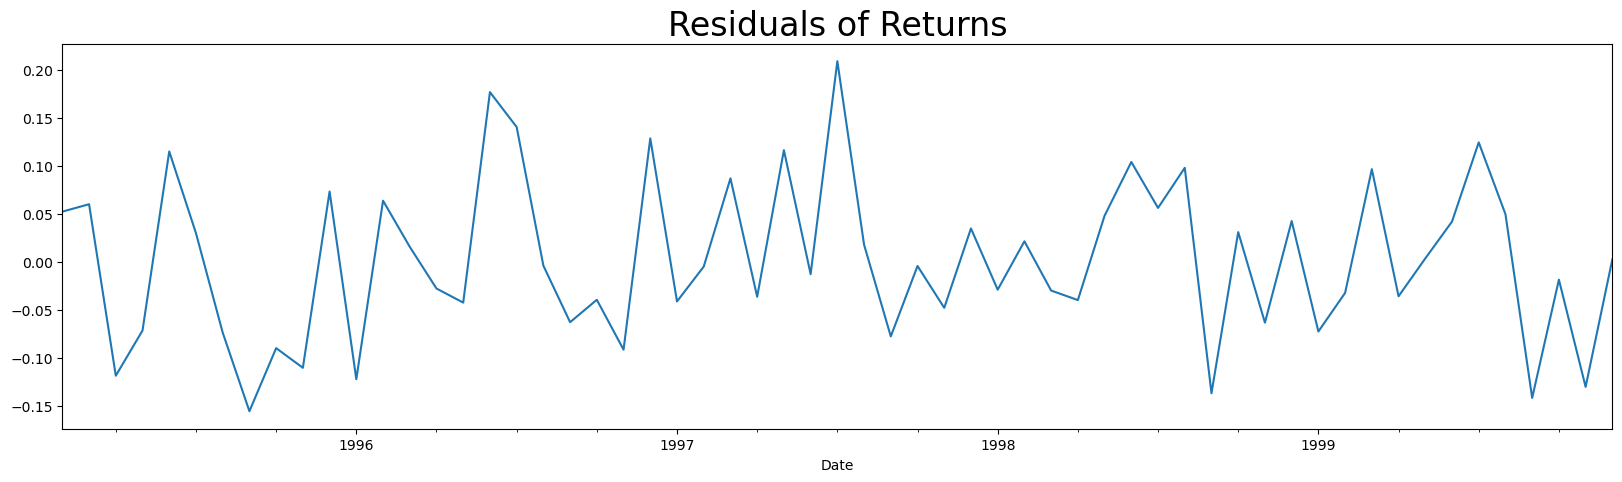

In [330]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [331]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [332]:
import warnings
warnings.filterwarnings('ignore')

model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [333]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

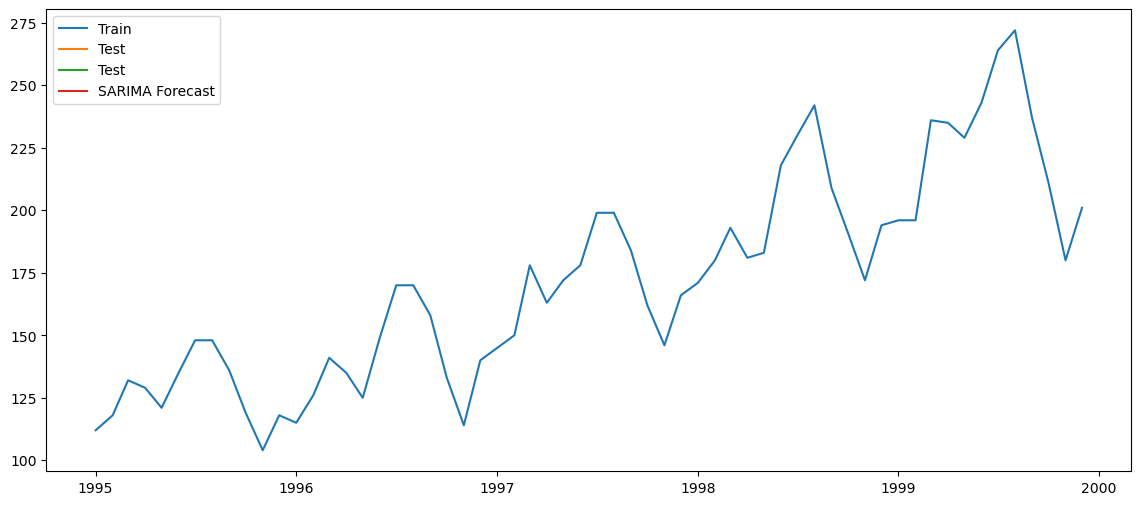

In [334]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [335]:
model_residual = model_fit.resid
model_residual.mean()

0.04478942214647326

In [336]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


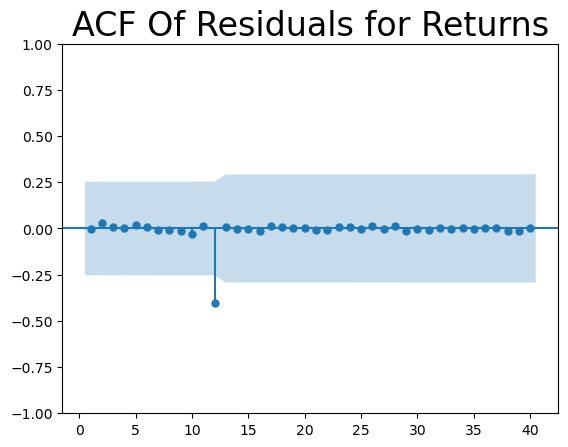

In [337]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

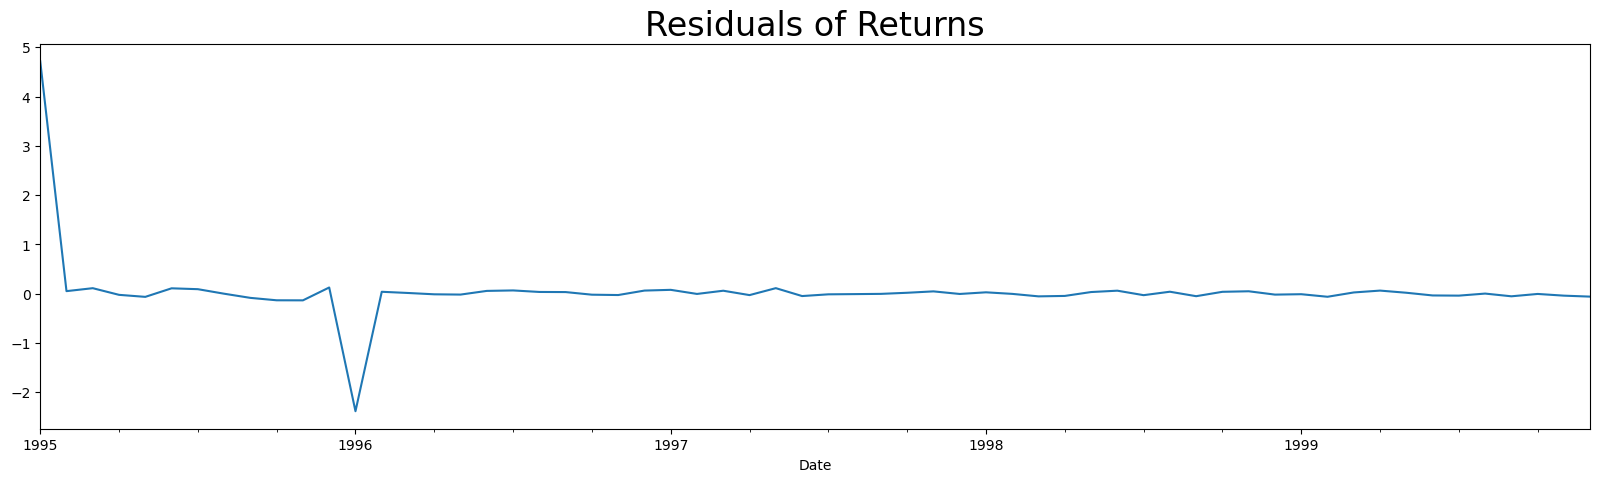

In [338]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [339]:
cocacola = df1.copy()
cocacola.reset_index(inplace=True)
cocacola['t'] = np.arange(1,len(cocacola)+1)
cocacola['t_squared'] = np.square(cocacola.t)
cocacola["month"] = cocacola.Date.dt.strftime("%b") # month extraction
cocacola["year"] = cocacola.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(cocacola['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([cocacola,months],axis=1)
cocacola['log_passengers'] = np.log(cocacola['Passengers'])
cocacola

,Date,Passengers,year,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1995,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,1995,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,1995,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,1995,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
5,1995-06-01,135,1995,6,36,Jun,0,0,0,0,0,1,0,0,0,0,0,0,4.905275
6,1995-07-01,148,1995,7,49,Jul,0,0,0,0,0,0,1,0,0,0,0,0,4.997212
7,1995-08-01,148,1995,8,64,Aug,0,0,0,0,0,0,0,1,0,0,0,0,4.997212
8,1995-09-01,136,1995,9,81,Sep,0,0,0,0,0,0,0,0,1,0,0,0,4.912655
9,1995-10-01,119,1995,10,100,Oct,0,0,0,0,0,0,0,0,0,1,0,0,4.779123


In [340]:
train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]
train_data

,Date,Passengers,year,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1995,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,1995,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,1995,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,1995,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
5,1995-06-01,135,1995,6,36,Jun,0,0,0,0,0,1,0,0,0,0,0,0,4.905275
6,1995-07-01,148,1995,7,49,Jul,0,0,0,0,0,0,1,0,0,0,0,0,4.997212
7,1995-08-01,148,1995,8,64,Aug,0,0,0,0,0,0,0,1,0,0,0,0,4.997212
8,1995-09-01,136,1995,9,81,Sep,0,0,0,0,0,0,0,0,1,0,0,0,4.912655
9,1995-10-01,119,1995,10,100,Oct,0,0,0,0,0,0,0,0,0,1,0,0,4.779123


In [341]:
test_data


,Date,Passengers,year,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers


In [342]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           9.67e-19
Time:                        18:13:36   Log-Likelihood:                -267.85
No. Observations:                  60   AIC:                             539.7
Df Residuals:                      58   BIC:                             543.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.8237      5.589     19.472      0.000      97.637     120.011
t              2.0615      0.159     12.937      0.000       1.743       2.380
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.337
Skew:                           0.028   Prob(JB):                        0.845
Kurtosis:                       2.637   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
Exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.45e-19
Time:                        18:13:38   Log-Likelihood:                 43.022
No. Observations:                  60   AIC:                            -82.04
Df Residuals:                      58   BIC:                            -77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7478      0.031    151.135      0.000       4.685       4.811
t              0.0121      0.001     13.511      0.000       0.010       0.014
==============================================================================
Omnibus:                        1.667   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.630
Skew:                          -0.321   Prob(JB):                        0.443
Kurtosis:                       2.510   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
Quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     83.51
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.15e-17
Time:                        18:13:40   Log-Likelihood:                -267.51
No. Observations:                  60   AIC:                             541.0
Df Residuals:                      57   BIC:                             547.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.0619      8.589     13.281      0.000      96.864     131.260
t              1.5546      0.650      2.393      0.020       0.254       2.856
t_squared      0.0083      0.010      0.805      0.424      -0.012       0.029
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.147
Skew:                          -0.055   Prob(JB):                        0.929
Kurtosis:                       2.785   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea
add_sea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.169
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.333
Time:                        18:13:43   Log-Likelihood:                -301.45
No. Observations:                  60   AIC:                             626.9
Df Residuals:                      48   BIC:                             652.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    158.4923      4.902     32.331      0.000     148.636     168.349
Jan          -10.6923     17.618     -0.607      0.547     -46.116      24.731
Feb           -4.4923     17.618     -0.255      0.800     -39.916      30.931
Mar           17.5077     17.618      0.994      0.325     -17.916      52.931
Apr           10.1077     17.618      0.574      0.569     -25.316      45.531
May            7.5077     17.618      0.426      0.672     -27.916      42.931
Jun           26.1077     17.618      1.482      0.145      -9.316      61.531
Jul           43.7077     17.618      2.481      0.017       8.284      79.131
Aug           47.7077     17.618      2.708      0.009      12.284      83.131
Sep           26.3077     17.618      1.493      0.142      -9.116      61.731
Oct            4.7077     17.618      0.267      0.790     -30.716      40.131
Nov          -15.2923     17.618     -0.868      0.390     -50.716      20.131
Dec            5.3077     17.618      0.301      0.765     -30.116      40.731
==============================================================================
Omnibus:                       17.848   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.249
Skew:                           0.222   Prob(JB):                        0.119
Kurtosis:                       1.774   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [346]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad
add_sea_Quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.02e-29
Time:                        18:13:46   Log-Likelihood:                -205.69
No. Observations:                  60   AIC:                             439.4
Df Residuals:                      46   BIC:                             468.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.9658      3.172     33.096      0.000      98.582     111.350
t              1.4807      0.259      5.727      0.000       0.960       2.001
t_squared      0.0104      0.004      2.540      0.015       0.002       0.019
Jan           -3.7023      3.655     -1.013      0.316     -11.060       3.656
Feb            0.4853      3.654      0.133      0.895      -6.870       7.841
Mar           20.4520      3.654      5.597      0.000      13.097      27.807
Apr           10.9979      3.654      3.009      0.004       3.642      18.354
May            6.3229      3.656      1.730      0.090      -1.036      13.682
Jun           22.8271      3.658      6.240      0.000      15.464      30.190
Jul           38.3104      3.661     10.465      0.000      30.942      45.679
Aug           40.1729      3.664     10.964      0.000      32.798      47.548
Sep           16.6146      3.668      4.530      0.000       9.231      23.998
Oct           -7.1647      3.673     -1.951      0.057     -14.557       0.228
Nov          -29.3647      3.678     -7.983      0.000     -36.769     -21.961
Dec          -10.9856      3.685     -2.981      0.005     -18.403      -3.568
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.097
Skew:                          -0.451   Prob(JB):                        0.351
Kurtosis:                       2.843   Cond. No.                     1.69e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.66e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [347]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea
Mul_sea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.149
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.347
Time:                        18:13:49   Log-Likelihood:                 7.3584
No. Observations:                  60   AIC:                             9.283
Df Residuals:                      48   BIC:                             34.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7233      0.029    165.624      0.000       4.666       4.781
Jan            0.2487      0.102      2.427      0.019       0.043       0.455
Feb            0.2945      0.102      2.873      0.006       0.088       0.501
Mar            0.4247      0.102      4.144      0.000       0.219       0.631
Apr            0.3801      0.102      3.709      0.001       0.174       0.586
May            0.3597      0.102      3.510      0.001       0.154       0.566
Jun            0.4704      0.102      4.590      0.000       0.264       0.677
Jul            0.5648      0.102      5.511      0.000       0.359       0.771
Aug            0.5809      0.102      5.668      0.000       0.375       0.787
Sep            0.4769      0.102      4.653      0.000       0.271       0.683
Oct            0.3490      0.102      3.405      0.001       0.143       0.555
Nov            0.2177      0.102      2.124      0.039       0.012       0.424
Dec            0.3558      0.102      3.472      0.001       0.150       0.562
==============================================================================
Omnibus:                       39.550   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.003
Skew:                           0.023   Prob(JB):                       0.0820
Kurtosis:                       1.586   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [348]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 
11.714670246780539
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           2.81e-34
Time:                        18:13:51   Log-Likelihood:                 113.62
No. Observations:                  60   AIC:                            -201.2
Df Residuals:                      47   BIC:                            -174.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3733      0.010    433.640      0.000       4.353       4.394
t              0.0124      0.000     39.705      0.000       0.012       0.013
Jan            0.2879      0.018     16.312      0.000       0.252       0.323
Feb            0.3212      0.018     18.215      0.000       0.286       0.357
Mar            0.4391      0.018     24.908      0.000       0.404       0.475
Apr            0.3820      0.018     21.678      0.000       0.347       0.417
May            0.3492      0.018     19.811      0.000       0.314       0.385
Jun            0.4475      0.018     25.379      0.000       0.412       0.483
Jul            0.5294      0.018     30.003      0.000       0.494       0.565
Aug            0.5331      0.018     30.182      0.000       0.498       0.569
Sep            0.4166      0.018     23.553      0.000       0.381       0.452
Oct            0.2763      0.018     15.595      0.000       0.241       0.312
Nov            0.1326      0.018      7.468      0.000       0.097       0.168
Dec            0.2583      0.018     14.517      0.000       0.223       0.294
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.294
Skew:                          -0.479   Prob(JB):                        0.318
Kurtosis:                       3.015   Cond. No.                     4.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [349]:
np.exp(pred_Mult_add_sea)

Series([], dtype: float64)

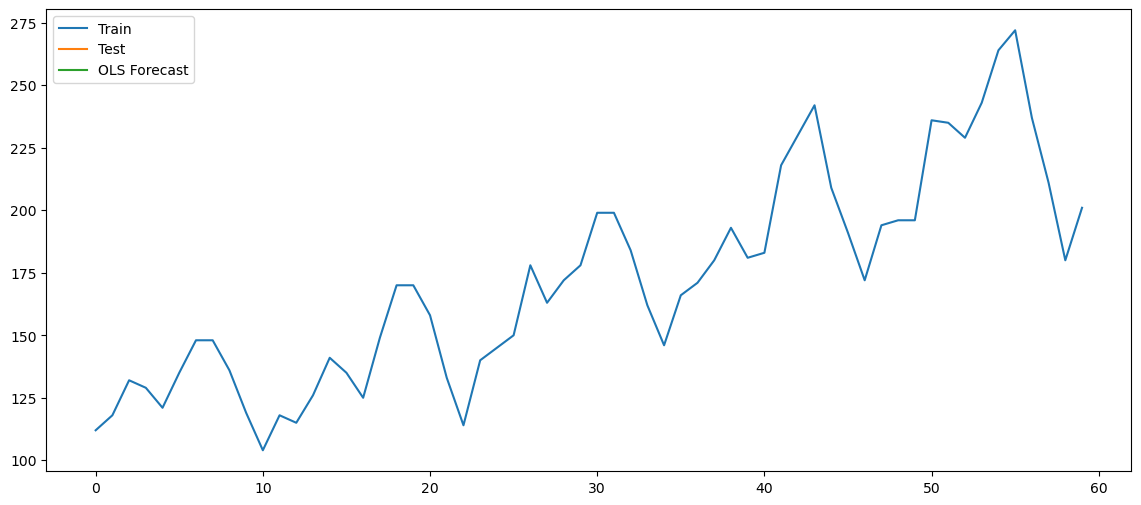

In [350]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(np.exp(pred_Mult_add_sea), label='OLS Forecast')
plt.legend(loc='best')
plt.show()